# Analyzing the scraped data
When scraping data from the internet, we often need to do some "sanity checks" to make sure that the collected data is what we expect it to be, because in scraping we are exposed to connection problems, bans from the host, and errors caused by the differences between the HTML structures of different web pages.

In this notebook, you are asked to plot some graphs to explore the data that you have collected and find the problems in it, if any.

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

## 1. Exploring the downloaded HTML files

### Task 1.1
In this task, you have to plot the distribution of the file sizes of the HTML pages that you have downloaded. Usually, all pages will have a similar size. If you notice that you have a number of files with a significantly different size than the majority of the files, then it may be a good idea to check these files and explore the reason behind this difference. For example, in our code we are saving empty HTML files if we face an error while downloading the web pages. Therefore, seeing a number of files with size zero in the histogram indicates that we have some HTML pages that were not downloaded.

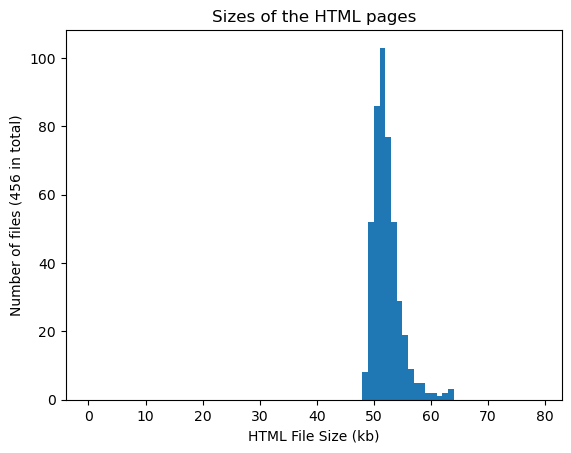

In [4]:
# Plot the distribution of the downloaded HTML file sizes
# WRITE YOUR CODE HERE
project_path = os.getcwd()
folder_name1 = "data"
folder_path1 = os.path.join(project_path, folder_name1)
folder_name2 = "raw_html"
folder_path2 = os.path.join(folder_path1, folder_name2)

html_sizes = {}

for filename in os.listdir(folder_path2):
    file_path = os.path.join(folder_path2, filename)
    if os.path.isfile(file_path):
        size_in_bytes = os.path.getsize(file_path)
        size_in_kb = size_in_bytes / (1024)
        html_sizes[filename] = size_in_kb

# Histogram çizimi
plt.hist(list(html_sizes.values()), bins=range(0, 80, 1))
plt.xlabel('HTML File Size (kb)')
plt.ylabel('Number of files (456 in total)')
plt.title('Sizes of the HTML pages')
plt.savefig('figures/html_file_size.png', dpi=600)
plt.show()

### Task 1.2
Since the HTML file size is significantly affected by the images it contains, another way to explore the downloaded HTML files is by looking at the number of lines in each file. In this task, you need to plot a distribution of the number of lines in the downloaded HTML files.

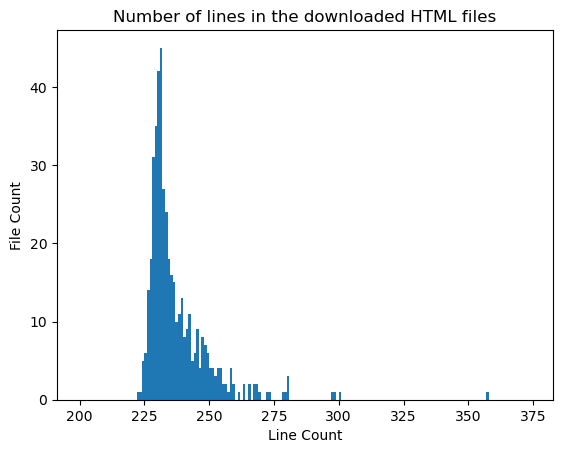

In [8]:
# Plot the distribution of line counts in the downloaded HTML files
# WRITE YOUR CODE HERE

import os
import linecache
import matplotlib.pyplot as plt

proj = os.getcwd()
folder_name1 = "data"
folder_path1 = os.path.join(proj, folder_name1)
folder_name2 = "raw_html"
folder_path2 = os.path.join(folder_path1, folder_name2)

html_line_counts = {}

for filename in os.listdir(folder_path2):
    file_path = os.path.join(folder_path2, filename)
    if os.path.isfile(file_path):
        num_lines = len(linecache.getlines(file_path))
        html_line_counts[filename] = num_lines+1

# Histogram çizimi
plt.hist(list(html_line_counts.values()),histtype='barstacked', bins=range(200, 375, 1))
plt.xlabel('Line Count')
plt.ylabel('File Count')
plt.title('Number of lines in the downloaded HTML files')
plt.savefig('figures/html_line_count.png', dpi=600)
plt.show()




# Save the final plot in figures/html_line_count.png using the code below
#plt.savefig('figures/html_line_count.png')

## 2. Exploring the processed data

### Task 2.1
The first thing to check is if we have extracted information from all of the collected links or not. In this task, you need to compare the number of links that you have collected (in link_list.txt) to the number of parsed data dictionaries (in parsed_data.jsons) that you have created by parsing the downloaded HTML files.

In [6]:
# Compute the number of links in link_list.txt
# WRITE YOUR CODE HERE
import json
proj = os.getcwd()


dataFolder = "data"

folder = os.path.join(proj, dataFolder)

textFile = "link_list.txt"
jsonFile = "parsed_data.jsons"
opentext = os.path.join(folder, textFile)
openJson = os.path.join(folder, jsonFile)



n_collected_links = 0
mytextFile = open(opentext, 'r')
for line in mytextFile:
    n_collected_links+=1
mytextFile.close()
n_parsed_links = 0
# Compute the number of the parsed data dictionaries in parsed_data.jsons
# WRITE YOUR CODE HERE
myjsonFile = open(openJson, 'r')
for line in myjsonFile:
    n_parsed_links+=1
myjsonFile.close()
print(f"Number of collected links: {n_collected_links-1}") #first line is labels
print(f"Number of parsed links: {n_parsed_links}")

Number of collected links: 456
Number of parsed links: 456


### Task 2.2
In this task, you need to plot the distribution of line counts in the text content that you extracted from the HTML web pages. This will help point out some errors in content extraction, if any.

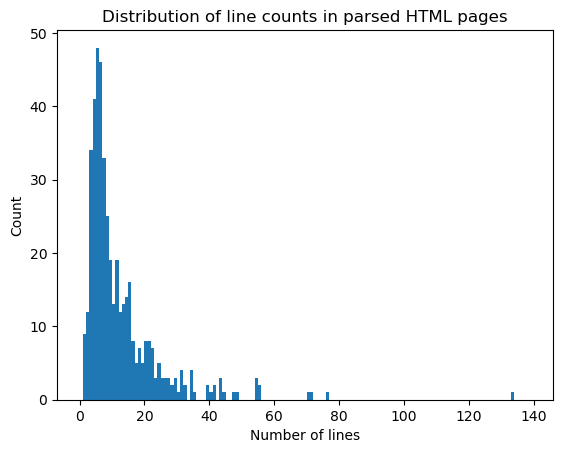

In [9]:
# Plot the distribution of line counts in the extracted text content
# WRITE YOUR CODE HERE
myjsonFile = open(openJson, 'r')
LineArray = []
#jsonString= json.loads(myjsonFile.read())
jsonArray = []

totalLines = 0 #to check total \n characters after if its true it should be 5010 lines





for line in myjsonFile:
    jsonArray.append(line)
    #print(line)
    #print("----------")
    contentIdx=line.find("content")
    res=line[contentIdx+11:]
    elementStr = (line.split("content",1)[1])
    #print(res)
    IdIdx=res.find(' "id": ')
    res2=res[0:IdIdx-2]
    nlines = elementStr.count("\\n")
    totalLines +=nlines
    LineArray.append(nlines+1) # Code counts number of new line character so with the first line there are actually (\n) number +1 lines
    #print("----------")
    #print(res2)
    #print("----------")
    #print(nlines)





#print(totalLines) 5010 true

myjsonFile.close()


plt.hist(LineArray, bins=range(0, 140, 1))
plt.xlabel('Number of lines')
plt.ylabel('Count')
plt.title('Distribution of line counts in parsed HTML pages')
plt.savefig('figures/content_line_count.png', dpi=600)
plt.show()

# Save the final plot in figures/content_line_count.png using the code below


### Task 2.3
In this task, you need to plot the distribution of the dates of the collected news articles.

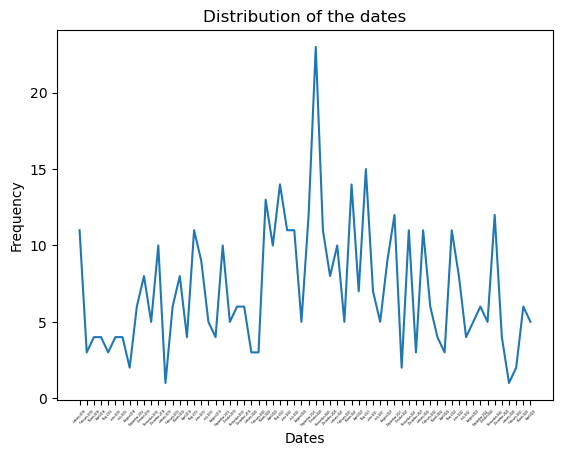

<Figure size 50000x600 with 0 Axes>

In [10]:
# Plot the distribution of dates from the extracted date information
# WRITE YOUR CODE HERE
from datetime import datetime
from collections import Counter
myjsonFile = open(openJson, 'r')
DateArray = []
JsonArray = []

for line in myjsonFile:
    JsonArray.append(line)
    #print(line)
   # print("----------")
    dateIdx=line.find("date")
    res=line[dateIdx+8:]
   # print(res)
    TitleIdx=res.find(' "title": ')
    res2=res[0:TitleIdx-2]
    #print("----------")
   # print(res2)
    #print("----------")
    DateArray.append(res2)
NewDateArr = []
for date in DateArray:
    newdates = date.split(",")
    newmonth = newdates[0][:-3]
    newyear = newdates[1]
    #print(newdates)
   # print(newmonth)
    #print(newmonth + newyear)
    NewDateArr.append(newmonth + newyear)

datesDatetimeObjArr = [datetime.strptime(t, "%B %Y") for t in NewDateArr]
DateTimeSorted = sorted(datesDatetimeObjArr)



sortedStringArr = []
for element in DateTimeSorted:
    formatted_date = element.strftime("%B %Y")
    sortedStringArr.append(formatted_date)
#print(sortedStringArr[83])

datesc = Counter(sortedStringArr)
plt.plot(datesc.keys(), datesc.values())
plt.xlabel('Dates')
plt.xticks(rotation=45,fontsize=2, fontfamily='Arial')
plt.ylabel('Frequency')
plt.title('Distribution of the dates')
plt.savefig('figures/date_dist.png', dpi= 3000)
plt.figure(figsize=(500,6))
plt.show()




"""datesc = Counter(DateArray)
plt.plot(datesc.keys(), datesc.values())

plt.xlabel('Dates', fontsize = 0.000001)
plt.xticks(rotation=45,fontsize=0.5, fontfamily='Arial')
plt.ylabel('Frequency')
plt.title('Distribution of the dates')
plt.savefig('figures/date_dist1.png', dpi= 3000)
plt.figure(figsize=(500,6))
plt.show()"""

#print(DateArray)

myjsonFile.close()

# Save the final plot in figures/date_dist.png using the code below
